# Context
## Problem Statement

- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# Content
## Attributes

### People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

### Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target
- Need to perform clustering to summarize customer segments.

## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
pd.set_option('max_columns',200)
sns.set()

### Loading the Dataset

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
# handling missing values
df['Income'] = df['Income'].fillna(df['Income'].median())

In [6]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


No duplicated values!

In [7]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


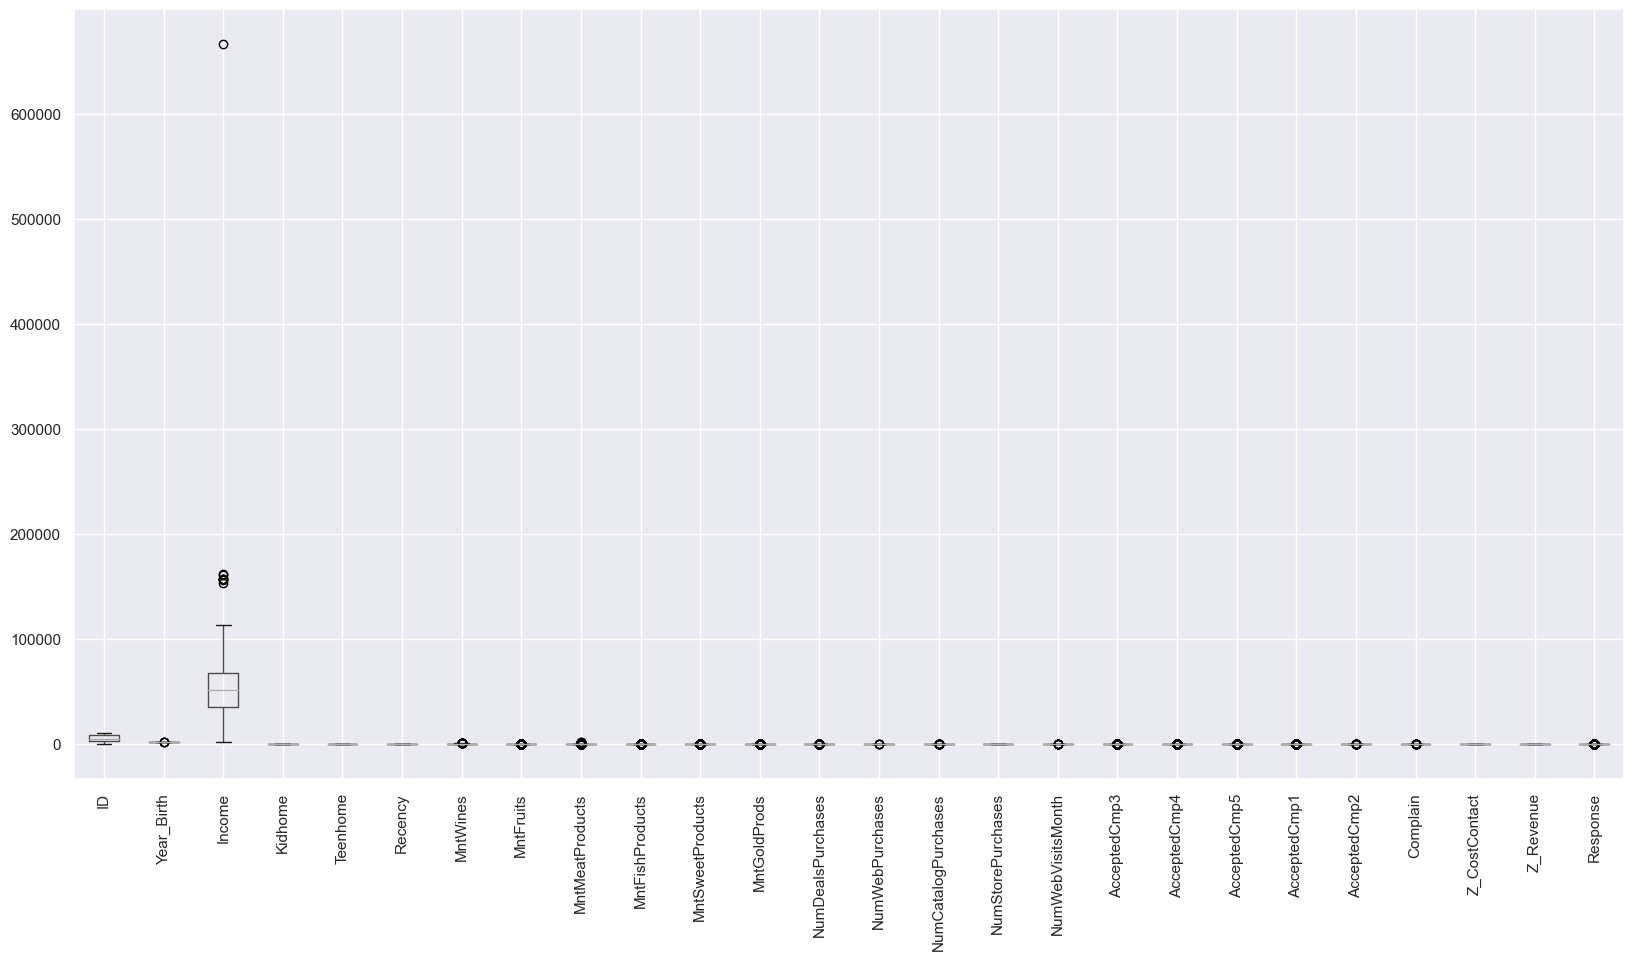

In [9]:
# Creating a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plotting the box plots for all columns
df.boxplot(ax=ax)

plt.xticks(rotation = 90)
plt.show()

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


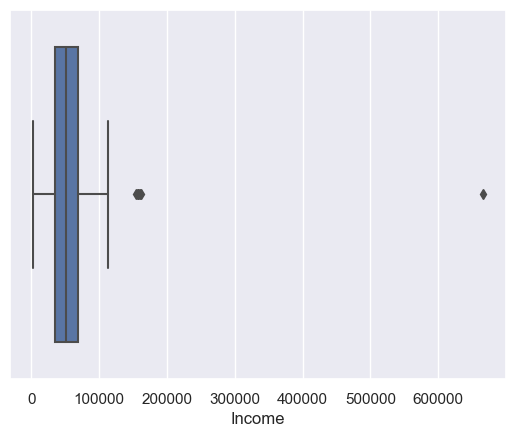

In [10]:
sns.boxplot(df['Income'])
plt.show()

## Removing The Outlier

In [11]:
df[df.Income > 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


In [12]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

outlier = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

print("Number of Outlier Incomes :", len(outlier))

Number of Outlier Incomes : 8


In [13]:
# removing the outliers
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [14]:
df.shape

(2232, 29)

## Feature Engineering

In [15]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Creating Age

In [16]:
df['Age'] = 2023 - df['Year_Birth']
df.head()

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42


### Handling Education Column

In [17]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [18]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in ['Basic']:
        return 'Middle'
    else:
        return 'Low'
    
df['Education_level'] = df['Education'].apply(education_level)
df.head()

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_level
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,High
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,High
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,High
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,High
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,High


### Handling Marital Status Column

In [19]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [20]:
def relationship_situation(marital_status):
    if marital_status in ['Alone' 'Absurd' 'YOLO' 'Widow', 'Divorced']:
        return 'Alone'
    else:
        return 'Couple'
    
df['Relationship_Situation'] = df['Marital_Status'].apply(relationship_situation)
df.head()

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_level,Relationship_Situation
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,High,Couple
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,High,Couple
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,High,Couple
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,High,Couple
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,High,Couple


In [21]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Education_level', 'Relationship_Situation'],
      dtype='object')

## Creating Parent Situation

In [22]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)
df.head()

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_level,Relationship_Situation,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,High,Couple,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,High,Couple,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,High,Couple,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,High,Couple,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,High,Couple,1


 ## Creating average spend per purchase

In [23]:
df['Average_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1) / df['NumDealsPurchases']
df.head()

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_level,Relationship_Situation,Is_Parent,Average_Spend
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,High,Couple,0,539.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,High,Couple,1,13.5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,High,Couple,0,776.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,High,Couple,1,26.5
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,High,Couple,1,84.4


## Creating a Total Spending Column

In [24]:
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntFishProducts'] + df['MntGoldProds']
df.head()

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_level,Relationship_Situation,Is_Parent,Average_Spend,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,High,Couple,0,539.0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,High,Couple,1,13.5,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,High,Couple,0,776.0,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,High,Couple,1,26.5,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,High,Couple,1,84.4,422


## Creating a column that shows monthly visits in companies website

In [25]:
df['Average_Company_Website_Visits'] = df['NumWebVisitsMonth'] / 12

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Creating a column that shows the ratio of online purchases to total purchases

In [26]:
df['Online_Purchase_Ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])
df.head()

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_level,Relationship_Situation,Is_Parent,Average_Spend,Total_Spending,Average_Company_Website_Visits,Online_Purchase_Ratio
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,High,Couple,0,539.0,1617,0.583333,0.363636
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,High,Couple,1,13.5,27,0.416667,0.250000
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,High,Couple,0,776.0,776,0.333333,0.400000
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,High,Couple,1,26.5,53,0.500000,0.333333
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,High,Couple,1,84.4,422,0.416667,0.357143


## Creating a column that shows the total number of campaigns accepted


In [27]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
df.head()

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_level,Relationship_Situation,Is_Parent,Average_Spend,Total_Spending,Average_Company_Website_Visits,Online_Purchase_Ratio,Total_Campaigns_Accepted
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,High,Couple,0,539.0,1617,0.583333,0.363636,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,High,Couple,1,13.5,27,0.416667,0.250000,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,High,Couple,0,776.0,776,0.333333,0.400000,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,High,Couple,1,26.5,53,0.500000,0.333333,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,High,Couple,1,84.4,422,0.416667,0.357143,0


## Dropping the non relevant colomns/features

In [28]:
drop_columns = ['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue']
df_cleaned_modified = df.drop(drop_columns, axis = 1) 

# EDA (Exploratory Data Analysis)

In [29]:
df_cleaned_modified.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Education_level',
       'Relationship_Situation', 'Is_Parent', 'Average_Spend',
       'Total_Spending', 'Average_Company_Website_Visits',
       'Online_Purchase_Ratio', 'Total_Campaigns_Accepted'],
      dtype='object')

## Income Distribution

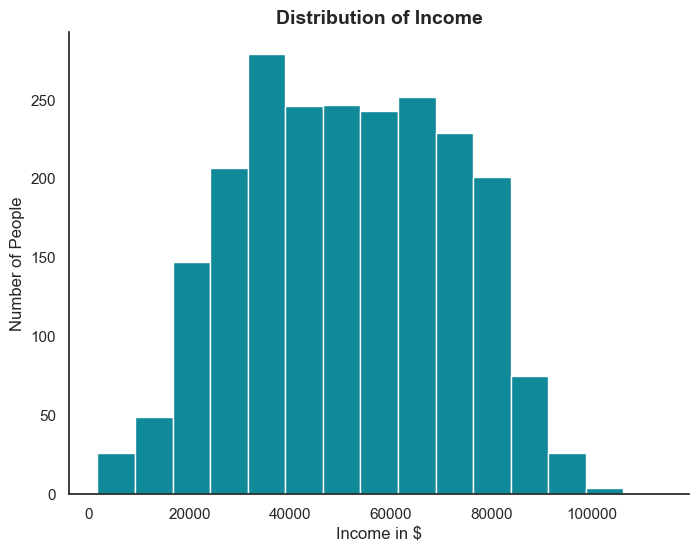

In [30]:
sns.set_style("white") 
plt.figure(figsize = (8, 6)) 
plt.hist(df_cleaned_modified["Income"], 
         bins = 15, 
         color = "#108A99")
plt.title("Distribution of Income", fontsize = 14, weight = "bold")
plt.xlabel("Income in $")
plt.ylabel("Number of People")
sns.despine() 
plt.show()

## Age Distribution

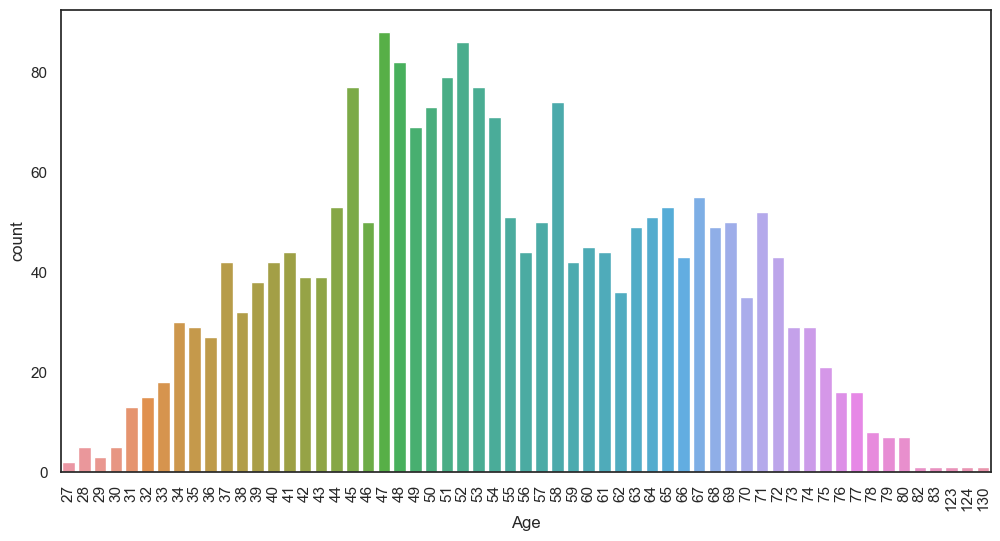

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Age', data = df_cleaned_modified)
plt.xticks(rotation = 90)
plt.show()

In [32]:
df_cleaned_modified[df_cleaned_modified['Age'] > 85]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education_level,Relationship_Situation,Is_Parent,Average_Spend,Total_Spending,Average_Company_Website_Visits,Online_Purchase_Ratio,Total_Campaigns_Accepted
192,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,123,Low,Alone,1,65.0,65,0.416667,0.400000,0
239,2n Cycle,Single,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,130,Low,Couple,1,22.0,22,0.333333,0.333333,0
339,PhD,Together,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,124,High,Couple,0,1853.0,1853,0.083333,0.285714,1


In [33]:
df_cleaned_modified.drop([192, 239, 339], axis=0, inplace=True)


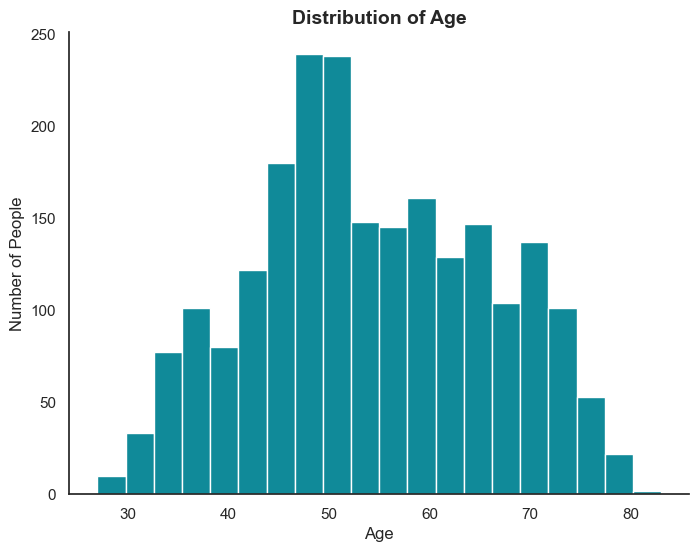

In [34]:
sns.set_style("white") 
plt.figure(figsize = (8, 6)) 
plt.hist(df_cleaned_modified["Age"], 
         bins = 20, 
         color = "#108A99")
plt.title("Distribution of Age", fontsize = 14, weight = "bold")
plt.xlabel("Age")
plt.ylabel("Number of People")
sns.despine() 
plt.show()

## Marital Status Distribution

In [35]:
df_cleaned_modified['Marital_Status'].value_counts()

Married     861
Together    575
Single      479
Divorced    230
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

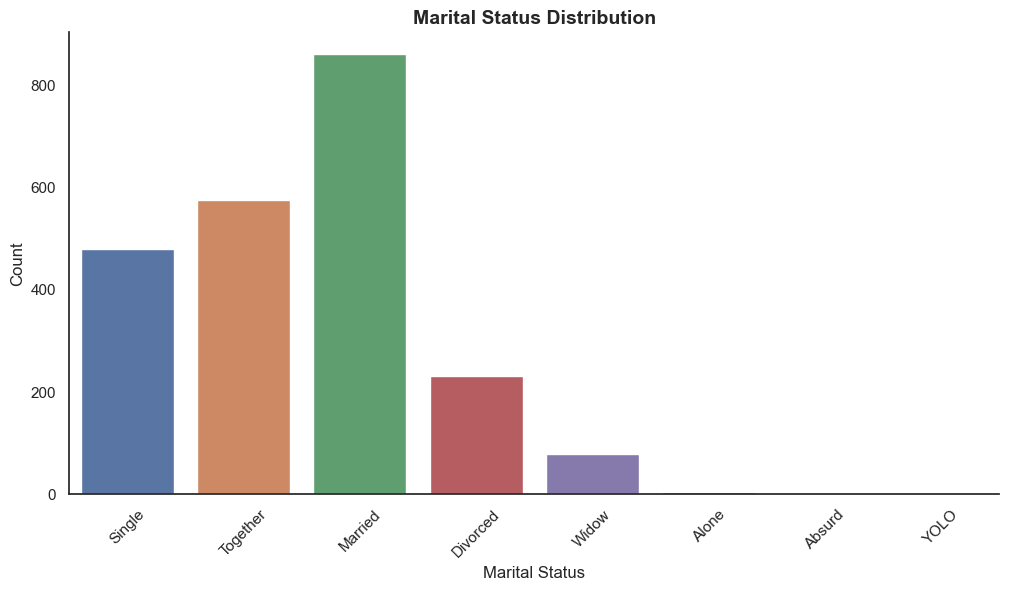

In [36]:
sns.set_style("white") 
plt.figure(figsize=(12,6))
sns.countplot(x = 'Marital_Status', data = df_cleaned_modified)
plt.title('Marital Status Distribution', fontsize = 14, weight = "bold")
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation = 45)
sns.despine()
plt.show()

## Education Distribution

In [37]:
df_cleaned_modified['Education_level'].value_counts()

High      1974
Low        201
Middle      54
Name: Education_level, dtype: int64

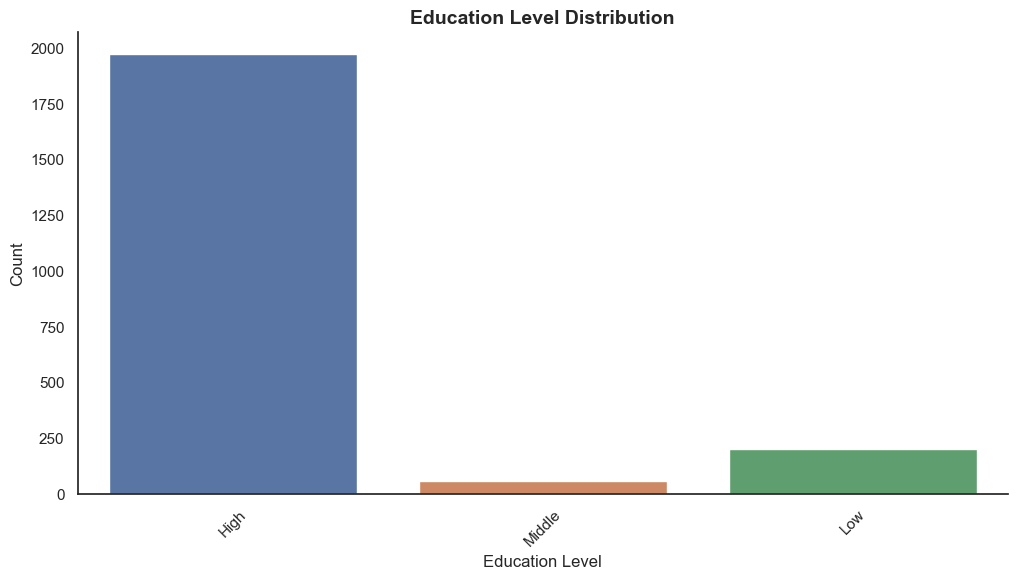

In [38]:
sns.set_style("white") 
plt.figure(figsize=(12,6))
sns.countplot(x = 'Education_level', data = df_cleaned_modified)
plt.title('Education Level Distribution', fontsize = 14, weight = "bold")
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation = 45)
sns.despine()
plt.show()

## Analyzing the correlation between Average Spend and Income in Relationship Situation

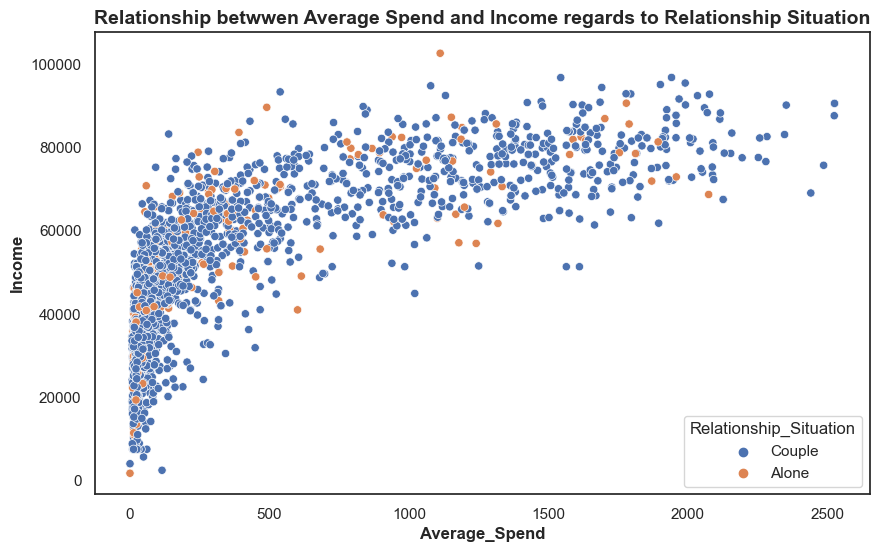

In [39]:
sns.set_style("white") 
plt.figure(figsize = (10, 6)) 
sns.scatterplot( x = df_cleaned_modified["Average_Spend"],  y = df_cleaned_modified['Income'],hue = df_cleaned_modified['Relationship_Situation'])
plt.title('Relationship betwwen Average Spend and Income regards to Relationship Situation', fontsize = 14, weight = 'bold')
plt.xlabel('Average_Spend', fontsize = 12, weight = 'bold')
plt.ylabel('Income', fontsize = 12, weight = 'bold')
plt.show()


- There seems to be no insight with this plot

- In average people who dont have kids tend to spend more. Its interesting

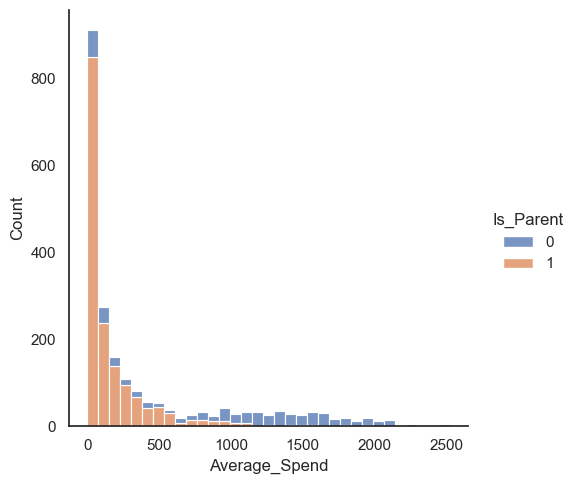

In [40]:
sns.displot(data=df_cleaned_modified, x="Average_Spend", hue="Is_Parent", multiple="stack")
plt.show()

- Parents tend to spend less money on average

In [41]:
 x = df_cleaned_modified['NumCatalogPurchases'].sum()
 
 y = df_cleaned_modified['NumStorePurchases'].sum()
 
 z = df_cleaned_modified['NumWebPurchases'].sum()
 
 print('Number of Catalog Purchases:%d\n Number of Store Purchases:%d\n Number of Web Purchases:%d' % (x,y,z))

Number of Catalog Purchases:5877
 Number of Store Purchases:12956
 Number of Web Purchases:9139


- Most of the products are bought from the store and web

In [42]:
df_cleaned_modified.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Education_level',
       'Relationship_Situation', 'Is_Parent', 'Average_Spend',
       'Total_Spending', 'Average_Company_Website_Visits',
       'Online_Purchase_Ratio', 'Total_Campaigns_Accepted'],
      dtype='object')

In [43]:
plt.figure(figsize=(8,6))
px.histogram(df_cleaned_modified, x='Total_Campaigns_Accepted', nbins=20, title="Distribution Total Accepeted Distribution")

<Figure size 800x600 with 0 Axes>

In [44]:
fig0 = px.histogram(df_cleaned_modified, x='Total_Spending', color='Marital_Status', title='Distribution total spending by Marital Status')
fig1 = px.histogram(df_cleaned_modified, x='Total_Spending', color='Education_level', title='Distribution total spending by Education Level')

fig0.show()
fig1.show()


### No surprises in these graphs;
- Marries couples tend to spend more in total because they live at least with their loved one or maybe even children so it makes sense.
- There are far more high educated people in this dataset because of that it seems like they spend more but it is related with the count of high educated people in the dataset.

## Clustering

In [45]:
df_cleaned_modified.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education_level,Relationship_Situation,Is_Parent,Average_Spend,Total_Spending,Average_Company_Website_Visits,Online_Purchase_Ratio,Total_Campaigns_Accepted
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,High,Couple,0,539.0,1617,0.583333,0.363636,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,High,Couple,1,13.5,27,0.416667,0.250000,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,High,Couple,0,776.0,776,0.333333,0.400000,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,High,Couple,1,26.5,53,0.500000,0.333333,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,High,Couple,1,84.4,422,0.416667,0.357143,0


In [46]:
df_cleaned_modified = pd.get_dummies(df_cleaned_modified, columns=['Marital_Status', 'Education', 'Education_level', 'Relationship_Situation'])
df_cleaned_modified.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Is_Parent,Average_Spend,Total_Spending,Average_Company_Website_Visits,Online_Purchase_Ratio,Total_Campaigns_Accepted,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Education_level_High,Education_level_Low,Education_level_Middle,Relationship_Situation_Alone,Relationship_Situation_Couple
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,0,539.0,1617,0.583333,0.363636,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,1,13.5,27,0.416667,0.250000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,0,776.0,776,0.333333,0.400000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,1,26.5,53,0.500000,0.333333,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,1,84.4,422,0.416667,0.357143,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
df_cleaned_modified.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Is_Parent',
       'Average_Spend', 'Total_Spending', 'Average_Company_Website_Visits',
       'Online_Purchase_Ratio', 'Total_Campaigns_Accepted',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Education_level_High', 'Education_level_Low',
       'Education_level_Middle', 'Relationship_Situation_A

In [49]:
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
            'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Campaigns_Accepted', 'Average_Spend', 'Is_Parent', 'Total_Spending']

In [50]:
df_cleaned_modified.dtypes

Income                            float64
Kidhome                             int64
Teenhome                            int64
Recency                             int64
MntWines                            int64
MntFruits                           int64
MntMeatProducts                     int64
MntFishProducts                     int64
MntSweetProducts                    int64
MntGoldProds                        int64
NumDealsPurchases                   int64
NumWebPurchases                     int64
NumCatalogPurchases                 int64
NumStorePurchases                   int64
NumWebVisitsMonth                   int64
AcceptedCmp3                        int64
AcceptedCmp4                        int64
AcceptedCmp5                        int64
AcceptedCmp1                        int64
AcceptedCmp2                        int64
Complain                            int64
Response                            int64
Age                                 int64
Is_Parent                         

In [51]:
df_fin = df_cleaned_modified[~df_cleaned_modified.isin([np.nan, np.inf, -np.inf]).any(1)]

In [52]:
scaler = StandardScaler()
df_fin[num_cols] = scaler.fit_transform(df_fin[num_cols])

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
df_fin.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Is_Parent,Average_Spend,Total_Spending,Average_Company_Website_Visits,Online_Purchase_Ratio,Total_Campaigns_Accepted,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Education_level_High,Education_level_Low,Education_level_Middle,Relationship_Situation_Alone,Relationship_Situation_Couple
0,0.345297,-0.836964,-0.945212,0.304781,1.007981,1.604653,1.823602,2.488573,1.548306,0.879964,0.350929,1.503271,2.683094,-0.562448,0.715821,-0.278169,-0.278169,-0.262581,-0.248355,-0.111829,-0.096092,2.423678,1.021032,-1.631454,0.229045,1.737585,0.583333,0.363636,-0.432422,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1,-0.244658,1.014861,0.891440,-0.386243,-0.869469,-0.637014,-0.728346,-0.643986,-0.630861,-0.737038,-0.190448,-1.164059,-0.576179,-1.183726,-0.155197,-0.278169,-0.278169,-0.262581,-0.248355,-0.111829,-0.096092,-0.412596,1.277906,0.612950,-0.709887,-0.958673,0.416667,0.250000,-0.432422,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
2,1.019339,-0.836964,-0.945212,-0.800857,0.379156,0.599768,-0.156521,1.364537,-0.129903,-0.027135,-0.731825,1.503271,-0.214038,1.301389,-0.590706,-0.278169,-0.278169,-0.262581,-0.248355,-0.111829,-0.096092,-0.412596,0.336035,-1.631454,0.652503,0.311451,0.333333,0.400000,-0.432422,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
3,-1.229985,1.014861,-0.945212,-0.800857,-0.869469,-0.559715,-0.662185,-0.496572,-0.580765,-0.756758,-0.190448,-0.783012,-0.938321,-0.562448,0.280312,-0.278169,-0.278169,-0.262581,-0.248355,-0.111829,-0.096092,-0.412596,-1.290832,0.612950,-0.686659,-0.914583,0.500000,0.333333,-0.432422,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,0.353051,1.014861,-0.945212,1.548623,-0.382054,0.445170,-0.199053,0.166794,0.020384,-0.559562,1.433684,0.360130,0.148104,0.058831,-0.155197,-0.278169,-0.278169,-0.262581,-0.248355,-0.111829,-0.096092,-0.412596,-1.033958,0.612950,-0.583207,-0.288848,0.416667,0.357143,-0.432422,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1


### The dataframe is ready for PCA

## PCA

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8, whiten=True)

df_fin_pca = pca.fit_transform(df_fin)

In [55]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

Text(0.5, 0, 'n_clusters')

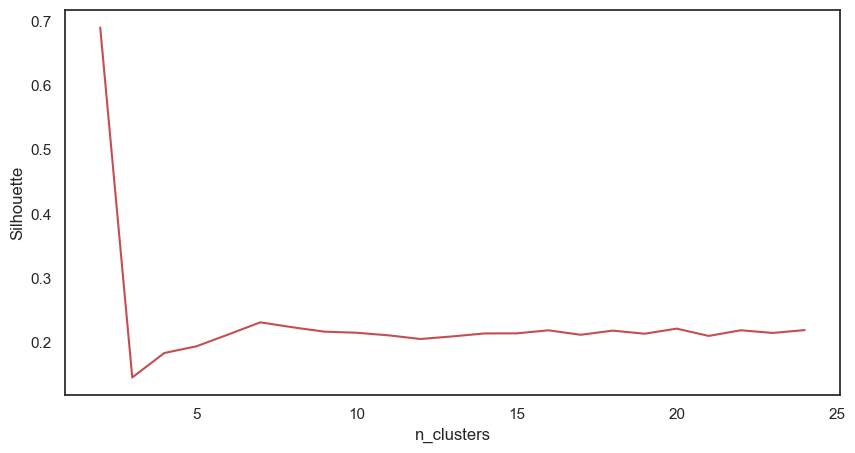

In [56]:
score = []
list_k = list(range(2, 25))
for k in list_k:
    kmeans = KMeans(n_clusters=k)
    preds = kmeans.fit_predict(df_fin_pca)
    
    siluet = silhouette_score(df_fin_pca, preds, metric='euclidean')
    score.append(siluet)
    
plt.figure(figsize=(10,5))
plt.plot(range(2, 25), score, "r-")
plt.ylabel("Silhouette")
plt.xlabel("n_clusters")

In [57]:
best_k = list_k[np.argmax(score)]
best_k

2

In [58]:
score

[0.6905628982742927,
 0.14554505928730993,
 0.18362168373548957,
 0.1940209349566689,
 0.212501144550079,
 0.23141736003688604,
 0.22374505091885902,
 0.21688367338710293,
 0.2152093184972466,
 0.21117172315312205,
 0.2054640335301512,
 0.20949660029495706,
 0.2141191680498457,
 0.21421012975425316,
 0.2189685225876042,
 0.2120099758654289,
 0.21849021652784267,
 0.2136861209609278,
 0.22161025508878865,
 0.21023326105963194,
 0.2190376263496717,
 0.2148970482787793,
 0.21931180294284064]

## K-Means Clustering

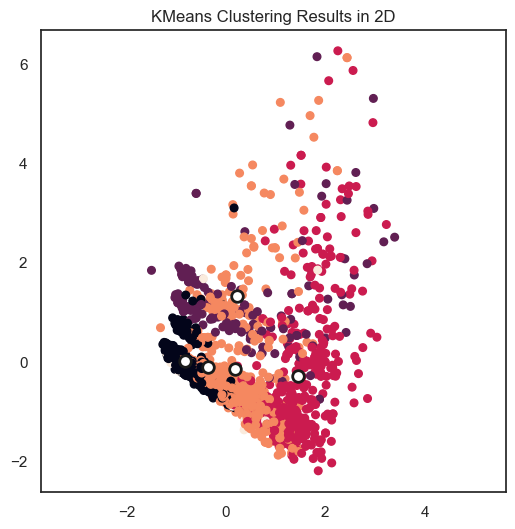

In [67]:
kmeans = KMeans(n_clusters=5)
preds = kmeans.fit_predict(df_fin_pca)
centre = kmeans.cluster_centers_

plt.figure(figsize=(6,6))
plt.scatter(df_fin_pca[:, 0], df_fin_pca[:, 1], c=preds, s= 30)
plt.scatter(centre[:, 0], centre[:,1], c='w', edgecolors='k', s= 70, linewidths=2)
plt.title('KMeans Clustering Results in 2D')
plt.axis("equal");

## Agglomerative Clustering


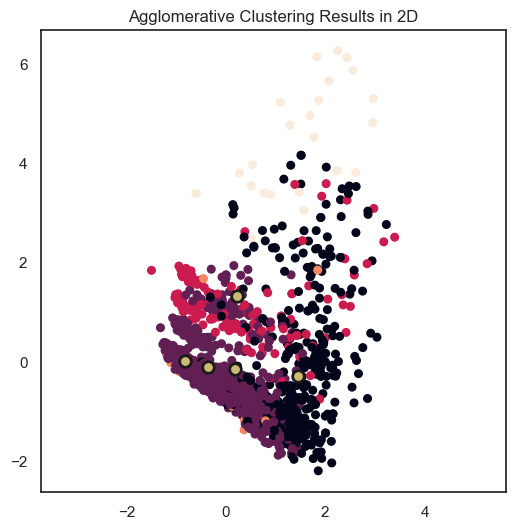

In [68]:
ahc = AgglomerativeClustering(n_clusters=5)
labels = ahc.fit_predict(df_fin_pca)
centre = kmeans.cluster_centers_

plt.figure(figsize=(6,6))
plt.scatter(df_fin_pca[:, 0], df_fin_pca[:, 1], c=labels, s= 30)
plt.scatter(centre[:, 0], centre[:,1], c='y', edgecolors='k', s= 70, linewidths=2)
plt.title('Agglomerative Clustering Results in 2D')
plt.axis("equal");

In [69]:
df_fin['cluster'] = labels
df_fin.head(3)

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Is_Parent,Average_Spend,Total_Spending,Average_Company_Website_Visits,Online_Purchase_Ratio,Total_Campaigns_Accepted,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Education_level_High,Education_level_Low,Education_level_Middle,Relationship_Situation_Alone,Relationship_Situation_Couple,cluster
0,0.345297,-0.836964,-0.945212,0.304781,1.007981,1.604653,1.823602,2.488573,1.548306,0.879964,0.350929,1.503271,2.683094,-0.562448,0.715821,-0.278169,-0.278169,-0.262581,-0.248355,-0.111829,-0.096092,2.423678,1.021032,-1.631454,0.229045,1.737585,0.583333,0.363636,-0.432422,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,-0.244658,1.014861,0.891440,-0.386243,-0.869469,-0.637014,-0.728346,-0.643986,-0.630861,-0.737038,-0.190448,-1.164059,-0.576179,-1.183726,-0.155197,-0.278169,-0.278169,-0.262581,-0.248355,-0.111829,-0.096092,-0.412596,1.277906,0.612950,-0.709887,-0.958673,0.416667,0.250000,-0.432422,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1
2,1.019339,-0.836964,-0.945212,-0.800857,0.379156,0.599768,-0.156521,1.364537,-0.129903,-0.027135,-0.731825,1.503271,-0.214038,1.301389,-0.590706,-0.278169,-0.278169,-0.262581,-0.248355,-0.111829,-0.096092,-0.412596,0.336035,-1.631454,0.652503,0.311451,0.333333,0.400000,-0.432422,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0


In [70]:
df_fin['cluster'].value_counts()

1    1539
0     451
2     149
4      27
3      20
Name: cluster, dtype: int64

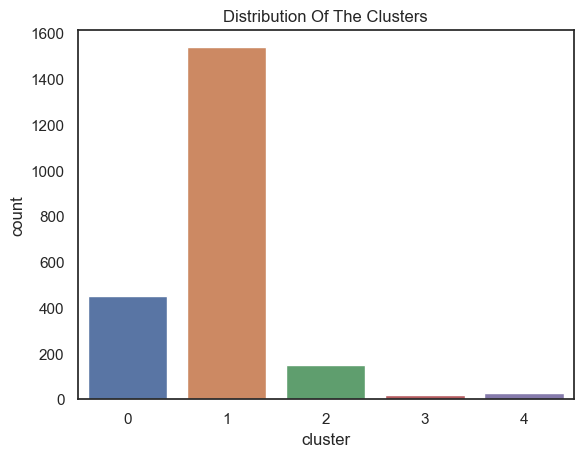

In [71]:
plot = sns.countplot(x=df_fin["cluster"])
plot.set_title("Distribution Of The Clusters")
plt.show()

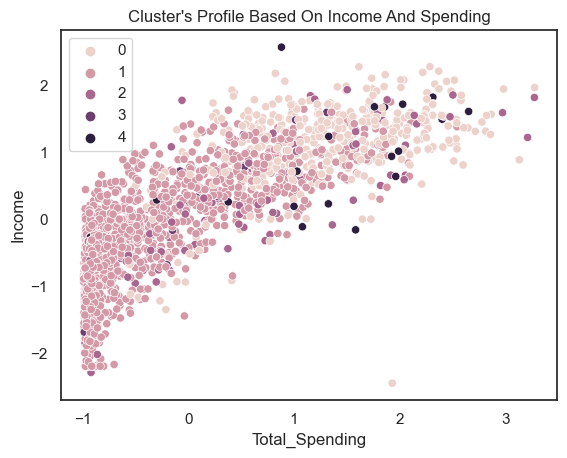

In [72]:
plot = sns.scatterplot(data = df_fin, x=df_fin["Total_Spending"], y=df_fin["Income"], hue=df_fin["cluster"])
plot.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

78.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



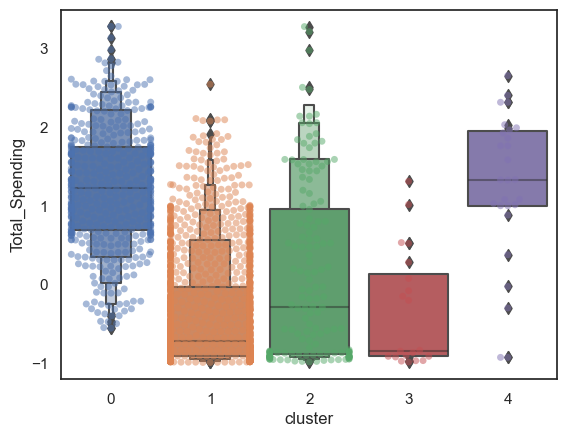

In [73]:
plt.figure()
plot=sns.swarmplot(x=df_fin["cluster"], y=df_fin["Total_Spending"], alpha=0.5 )
plot=sns.boxenplot(x=df_fin["cluster"], y=df_fin["Total_Spending"])
plt.show()

In [75]:
df_fin.to_csv('df_fin_pca.csv')